# Construção de um chatbot baseado em IA para responder dúvidas sobre o vestibular da Unicamp 2025.

#### Autora: Luciana Nogueira de Paula Souza

## Descrição do Projeto

Esse projeto tem como objetivo a construção de um chatbot que utilize um LLM - modelo de linguagem de grande escala - para responder questões sobre o Vestibular da Unicamp, usando como base a Resolução GR-029/2024, de 10/07/2024, que dispõe sobre o Vestibular Unicamp 2025 para vagas no ensino de Graduação.

Para isso, as ferramentas escolhidas no desenvolvimento do chatbot foram:
<ul>
    <li>LLM: API do Llama3-70B</li>
    <li>Framework para NLP: LangChain</li>
    <li>Aplicação Web: Streamlit</li>
    <li>Programação em Python</li>
</ul>

## Etapas do Projeto

### 1. Entendimento do Documento
O projeto se inicia com a leitura da Resolução GR-029/2024 para identificação do tipo e formato de conteúdo, extensão do documento, e temas tratados.
O documento é relativamente extenso - possui 76 páginas - e contém um regulamento dividido em Artigos (com parágrafos), e Anexos. A maioria do conteúdo está em texto, mas algumas informações estão em formato de tabela. 
Esse conteúdo deve ser estruturado para que possa ser compreendido pela IA. Os formatos mais utilizados são PDF, JSON, CSV, entre outros. Neste projeto utilizei o documento em formato PDF, realizando seu processamento com auxílio do PyPDFLoader da LangChain. Apesar do documento não ser muito pesado, dividi o documento em vários arquivos (10), para tornar o processo mais rápido, e também pensando em criar um código que possa ser adaptado para documentos maiores. 

### 2. Definindo o Escopo do Chatbot

O código do chatbot deve executar as seguintes funções: 

<ol>
    <li>Importação e processamento do arquivo PDF</li>
    <li>Quebra do conteúdo em partes menores (chunks), para facilitar a manipulação</li>
    <li>Tokenização e criação da base de vetores de embeddings</li>
    <li>Busca de partes do documento relacionadas com o contexto da pergunta</li>
    <li>Com o resultado da busca, formulação do prompt a ser enviado ao LLM</li>
    <li>Envio do prompt</li>
    <li>Requisição da resposta ao modelo</li>
</ol>


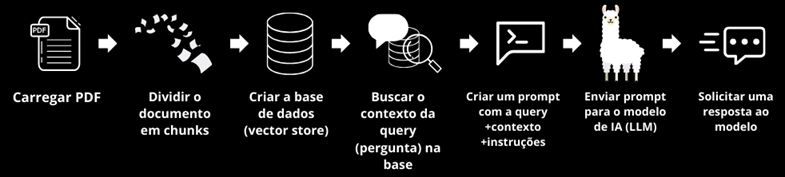

O LLM escolhido para o projeto foi o LLama3-70B, por ser a opção gratuita, e a API para o uso do modelo foi configurada através do Groq (http://groq.com).

Para o processamento de linguagem, optei por utilizar o LangChain, que oferece uma ampla gama de recursos através de suas diversas bibliotecas e integrações com outras ferramentas. O LangChain facilita a realização de várias etapas do processamento de linguagem por meio de seus frameworks integrados. O processamento do PDF foi feito com o módulo PyPDFLoader; A conversão do texto em vetores foi feita com o módulo HuggingFaceEmbeddings (mesmo que o Sentence Transformers quando usa-se o HuggingFace diretamente); A biblioteca de vetores foi feita com o módulo FAISS; E a interação com o LLM foi feito com o módulo ChatGroq.

A aplicação web foi desenvolvida com o Streamlit, outra ferramenta excelente que oferece um uso prático para criar interfaces interativas. Com o Streamlit construí uma aplicação com layout de messenger, permitindo que usuários interajam facilmente com o chatbot.

### 3. Preparação das Ferramentas
#### API do LLM:

A chave API do Llama3 foi configurada através do serviço Groq, e armazenada como variável de ambiente para ser chamada no código:

In [ ]:
import os
api_key = os.getenv("GROQ_API_KEY")
os.environ["GROQ_API_KEY"] = api_key

#### LangChain:

As bibliotecas do langchain foram instaladas, e importadas no código:

In [2]:
# Processamento do arquivo de PDF
from langchain.document_loaders import PyPDFLoader

# Tokenização e criação de vetores de embedding
from langchain_huggingface import HuggingFaceEmbeddings

# Criação da vector store (base de vetores de embedding)
from langchain import FAISS

# Interação com o LLM através do Groq
from langchain_groq import ChatGroq

Estruturei o código com funções, sendo uma função *"process_pdfs"* para importar e processar o documento PDF, uma função *"create_vector_store"* para transformar o documento em uma base de vetores, e uma função *"query_groq_rag"* que faz a conversa da query com o documento e o modelo de linguagem.
A função principal então encadeia as outras funções e exibe a resposta. 

### 5. Testes e Ajustes

Durante o desenvolvimento, testei o código com perguntas que podem ser comuns e cuja resposta deve ser específica, como por exemplo:

*"Qual o número de vagas oferecidas no vestibular em 2025?"* \
*"Qual prazo de inscrição?"*\
*"Qual o valor da taxa de inscrição?"*\
*"Qual a data da primeira prova?"*\
*"Quem já está matriculado em algum curso pode se matricular novamente?"*

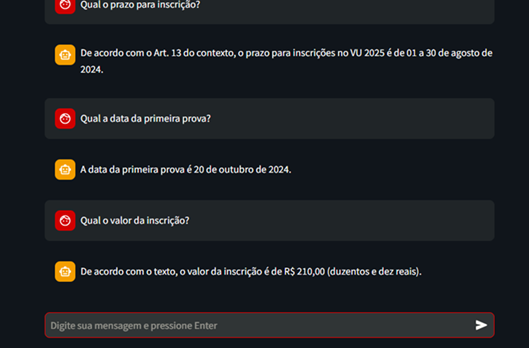

Algumas perguntas não estavam trazendo as respostas esperadas, então com base na leitura da Resolução, elaborei um conjunto de perguntas e respostas mais comuns que podem ser feitas pelos usuários, adicionando essas páginas ao final do conjunto de PDFs da Resolução, para serem lidas junto com o documento. Isso melhorou um pouco o resultado. 

### 6. Desenvolvimento da Interface com Streamlit


Após testes com o código no Jupyter para verificar o funcionamento correto do programa, a próxima etapa foi a adaptação do código para execução com o Streamlit.
Para um visual mais dinâmico pensei em fazer um layout no mesmo estilo do ChatGPT, que mantém o histórico da conversa na tela. Na documentação do Streamlit encontrei instruções para esse efeito. 

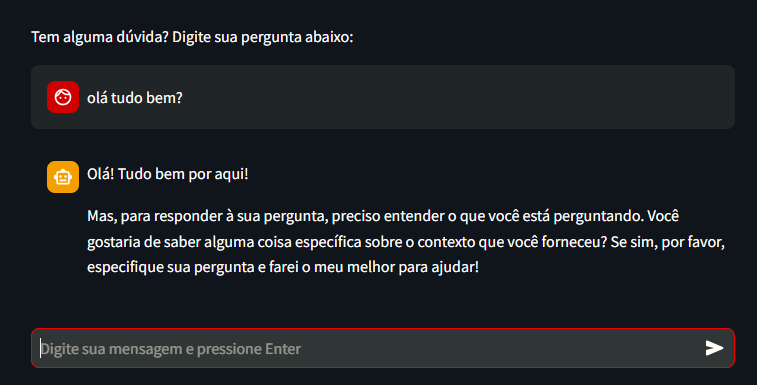


### 7. Deploy
O deploy foi realizado através do Streamlit Apps, que é uma ferramenta gratuita e muito intuitiva. 

## Observações Adicionais

O ChatGPT-4o-mini foi utilizado como suporte e orientação durante este projeto: Orientação dos passos necessários para a realização do projeto; explicações sobre as etapas onde eu não tinha familiaridade; sugestões de ferramentas; sugestões e correções de códigos; ajuda para pensar em como melhorar o programa e identificar em que etapas estão as falhas. 

Durante o desenvolvimento do projeto, testei o uso de outras ferramentas e bibliotecas que não tiveram resultados satisfatórios. Estruturei o documento em JSON, usei bibliotecas como NLTK e SpaCy, usei o Transformers, usei o Groq diretamente. Obtive versões do chatbot que apenas faziam uma função de busca de palavra-chave, ou que apenas inventavam uma resposta. Os resultados mais precisos foram obtidos com as ferramentas escolhidas, principalmente com o uso do LangChain.

**Pontos a melhorar**: O chatbot se beneficiaria de ajustes mais profundos no processo da interpretação da linguagem da query, pois dependendo de como a pergunta foi formulada, ele pode não compreender e assim não retornar uma resposta. Durante os testes percebi que uma mesma pergunta feita de formas diferentes pode falhar em retornar o resultado correto dependendo de como as palavras são escolhidas. 

## Referências

-[Documentação do LangChain](https://python.langchain.com/v0.2/docs/tutorials/chatbot/)\
-[Documentação do Groq](https://console.groq.com/docs/quickstart)\
-[Documentação do Sentence Transformers - HuggingFace](https://python.langchain.com/v0.2/docs/integrations/text_embedding/sentence_transformers/)\
-[Documentação do Streamlit](https://docs.streamlit.io/)
